In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pgeocode
import geopandas as gpd
import geoplot

In [6]:
# Importing Data Set 
evictBydemo_df = pd.read_csv('ETL_Project/Resources/NYC_Evictions_Demographics.csv')
evictBydemo_df

,Unnamed: 0,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY
0,26,421,11230,248,0.78,0.22,0.00,0.00,0.00,0.03,0.87,0.01,0.07,0.02,0.01,0.99,0.00,0.17,0.83,0.11
1,21,209,11219,214,0.85,0.15,0.00,0.00,0.00,0.00,0.96,0.00,0.03,0.00,0.01,0.99,0.00,0.52,0.48,0.03
2,20,238,11218,111,0.87,0.13,0.00,0.01,0.00,0.03,0.86,0.05,0.05,0.00,0.07,0.92,0.01,0.46,0.54,0.14
3,22,318,11223,109,0.49,0.51,0.00,0.01,0.00,0.06,0.87,0.01,0.05,0.00,0.06,0.94,0.01,0.18,0.82,0.13
4,12,1896,10467,106,0.61,0.39,0.00,0.48,0.01,0.04,0.01,0.44,0.02,0.00,0.09,0.89,0.02,0.31,0.69,0.99
5,23,383,11224,93,0.57,0.43,0.00,0.15,0.00,0.08,0.04,0.65,0.09,0.00,0.06,0.92,0.01,0.30,0.70,0.97
6,13,1401,10468,81,0.57,0.43,0.00,0.43,0.00,0.04,0.00,0.44,0.09,0.00,0.02,0.98,0.00,0.28,0.72,1.00
7,11,1194,10466,65,0.60,0.40,0.02,0.22,0.00,0.00,0.00,0.77,0.00,0.00,0.05,0.95,0.00,0.26,0.74,1.01
8,9,649,10463,59,0.56,0.44,0.00,0.61,0.00,0.00,0.03,0.31,0.05,0.00,0.05,0.92,0.03,0.34,0.66,0.97
9,27,465,11234,59,0.49,0.51,0.00,0.14,0.00,0.00,0.63,0.17,0.07,0.00,0.02,0.98,0.00,0.03,0.97,0.38


In [7]:
evictBydemo_df['ZIPCODE'] = evictBydemo_df['ZIPCODE'].astype(str)

In [8]:
nomi = pgeocode.Nominatim('us')

evictBydemo_df['Latitude'] = (nomi.query_postal_code(evictBydemo_df['ZIPCODE'].tolist()).latitude)
evictBydemo_df['Longitude'] = (nomi.query_postal_code(evictBydemo_df['ZIPCODE'].tolist()).longitude)

In [20]:
n_minority = evictBydemo_df["Total Evictions"]*evictBydemo_df["PERCENT MINORITY"]
evictBydemo_df['N_Minority'] = n_minority

evictBydemo_df

,Unnamed: 0,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,...,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY,Latitude,Longitude,geometry,N_Minority
0,26,421,11230,248,0.78,0.22,0.00,0.00,0.00,0.03,...,0.01,0.99,0.00,0.17,0.83,0.11,40.6225,-73.9650,POINT (-73.96500 40.62250),46.31
1,21,209,11219,214,0.85,0.15,0.00,0.00,0.00,0.00,...,0.01,0.99,0.00,0.52,0.48,0.03,40.6336,-73.9960,POINT (-73.99600 40.63360),6.27
2,20,238,11218,111,0.87,0.13,0.00,0.01,0.00,0.03,...,0.07,0.92,0.01,0.46,0.54,0.14,40.6424,-73.9758,POINT (-73.97580 40.64240),33.32
3,22,318,11223,109,0.49,0.51,0.00,0.01,0.00,0.06,...,0.06,0.94,0.01,0.18,0.82,0.13,40.5979,-73.9743,POINT (-73.97430 40.59790),41.34
4,12,1896,10467,106,0.61,0.39,0.00,0.48,0.01,0.04,...,0.09,0.89,0.02,0.31,0.69,0.99,40.8737,-73.8712,POINT (-73.87120 40.87370),1877.04
5,23,383,11224,93,0.57,0.43,0.00,0.15,0.00,0.08,...,0.06,0.92,0.01,0.30,0.70,0.97,40.5767,-73.9884,POINT (-73.98840 40.57670),371.51
6,13,1401,10468,81,0.57,0.43,0.00,0.43,0.00,0.04,...,0.02,0.98,0.00,0.28,0.72,1.00,40.8662,-73.9003,POINT (-73.90030 40.86620),1401.00
7,11,1194,10466,65,0.60,0.40,0.02,0.22,0.00,0.00,...,0.05,0.95,0.00,0.26,0.74,1.01,40.8904,-73.8503,POINT (-73.85030 40.89040),1205.94
8,9,649,10463,59,0.56,0.44,0.00,0.61,0.00,0.00,...,0.05,0.92,0.03,0.34,0.66,0.97,40.8798,-73.9067,POINT (-73.90670 40.87980),629.53
9,27,465,11234,59,0.49,0.51,0.00,0.14,0.00,0.00,...,0.02,0.98,0.00,0.03,0.97,0.38,40.6205,-73.9239,POINT (-73.92390 40.62050),176.70


/Users/tifanibiro/Documents/MossRehab/Bootcamp/Classes/.conda/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/tifanibiro/Documents/MossRehab/Bootcamp/Classes/.conda/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/tifanibiro/Documents/MossRehab/Bootcamp/Classes/.conda/lib/python3.10/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/tifanibiro/Document

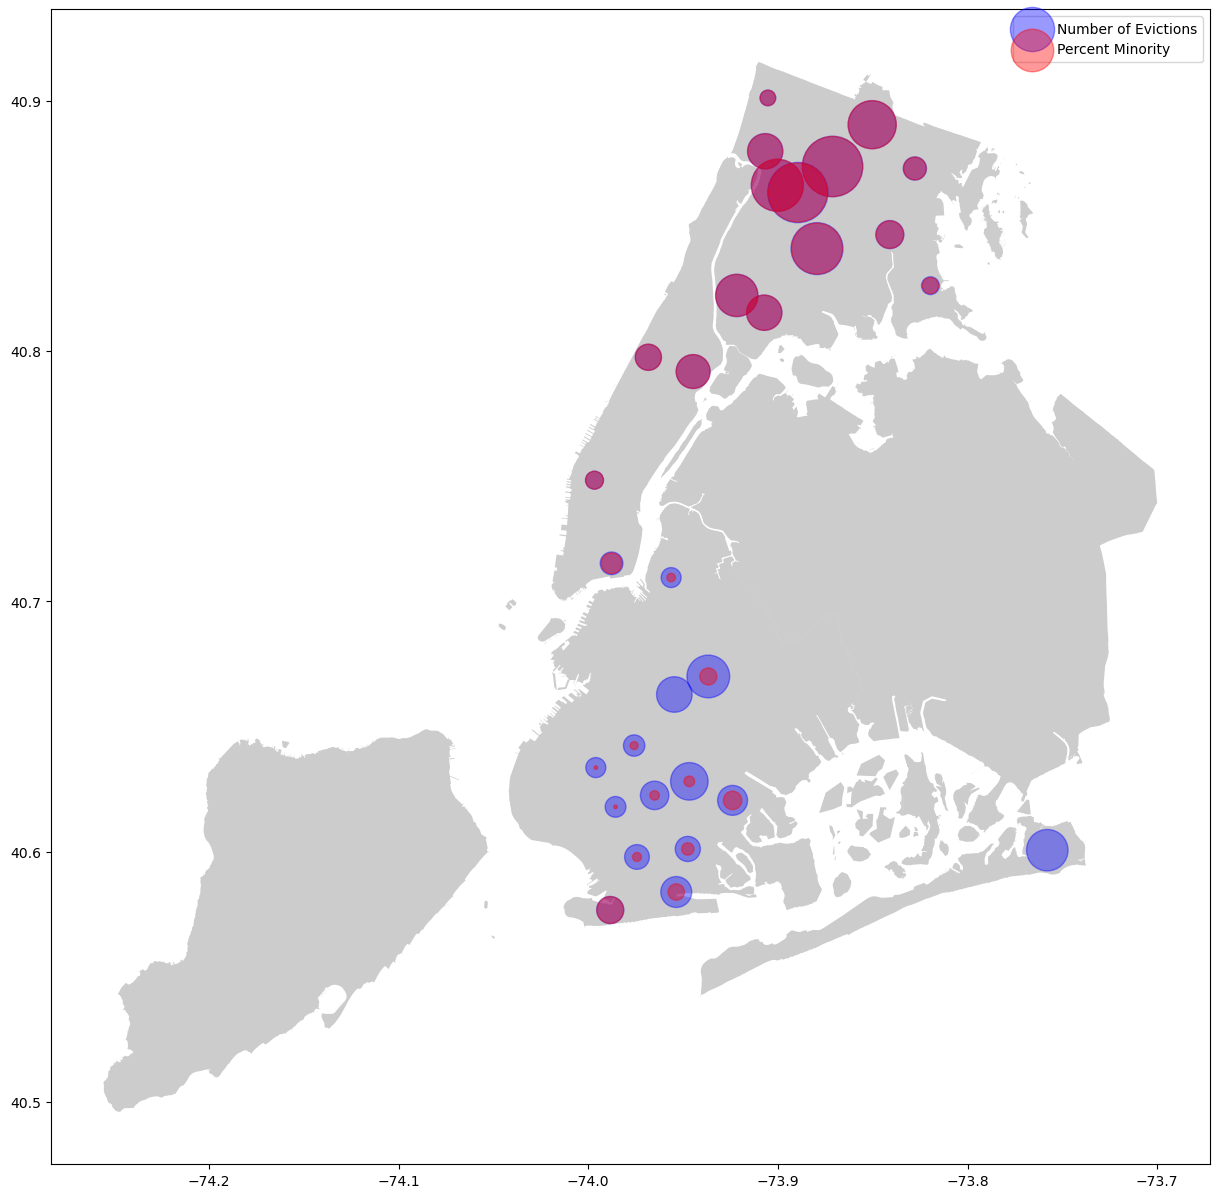

In [21]:
crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(evictBydemo_df,crs=crs,geometry=gpd.points_from_xy(evictBydemo_df['Longitude'], evictBydemo_df['Latitude']))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot("Total Evictions",ax=ax, markersize="Total Evictions", color="blue", alpha=0.4, label="Number of Evictions")
geo_df.plot("N_Minority",ax=ax, markersize="N_Minority", color="red", alpha=0.4, label="Percent Minority")
plt.legend()

In [11]:
geo_df

,Unnamed: 0,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,...,PERCENT ETHNICITY UNKNOWN,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY,Latitude,Longitude,geometry
0,26,421,11230,248,0.78,0.22,0.00,0.00,0.00,0.03,...,0.02,0.01,0.99,0.00,0.17,0.83,0.11,40.6225,-73.9650,POINT (-73.96500 40.62250)
1,21,209,11219,214,0.85,0.15,0.00,0.00,0.00,0.00,...,0.00,0.01,0.99,0.00,0.52,0.48,0.03,40.6336,-73.9960,POINT (-73.99600 40.63360)
2,20,238,11218,111,0.87,0.13,0.00,0.01,0.00,0.03,...,0.00,0.07,0.92,0.01,0.46,0.54,0.14,40.6424,-73.9758,POINT (-73.97580 40.64240)
3,22,318,11223,109,0.49,0.51,0.00,0.01,0.00,0.06,...,0.00,0.06,0.94,0.01,0.18,0.82,0.13,40.5979,-73.9743,POINT (-73.97430 40.59790)
4,12,1896,10467,106,0.61,0.39,0.00,0.48,0.01,0.04,...,0.00,0.09,0.89,0.02,0.31,0.69,0.99,40.8737,-73.8712,POINT (-73.87120 40.87370)
5,23,383,11224,93,0.57,0.43,0.00,0.15,0.00,0.08,...,0.00,0.06,0.92,0.01,0.30,0.70,0.97,40.5767,-73.9884,POINT (-73.98840 40.57670)
6,13,1401,10468,81,0.57,0.43,0.00,0.43,0.00,0.04,...,0.00,0.02,0.98,0.00,0.28,0.72,1.00,40.8662,-73.9003,POINT (-73.90030 40.86620)
7,11,1194,10466,65,0.60,0.40,0.02,0.22,0.00,0.00,...,0.00,0.05,0.95,0.00,0.26,0.74,1.01,40.8904,-73.8503,POINT (-73.85030 40.89040)
8,9,649,10463,59,0.56,0.44,0.00,0.61,0.00,0.00,...,0.00,0.05,0.92,0.03,0.34,0.66,0.97,40.8798,-73.9067,POINT (-73.90670 40.87980)
9,27,465,11234,59,0.49,0.51,0.00,0.14,0.00,0.00,...,0.00,0.02,0.98,0.00,0.03,0.97,0.38,40.6205,-73.9239,POINT (-73.92390 40.62050)
